In [5]:
pip install pandas numpy matplotlib seaborn scikit-learn xgboost lightgbm


Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install pandas numpy seaborn matplotlib scikit-learn



📊 Model Performance Summary (Log Price):
                Model       MAE      RMSE  R2 Score
0  Linear Regression  0.598854  0.748359 -0.003086
1      Random Forest  0.621513  0.758657 -0.030882
2            XGBoost  0.652251  0.825170 -0.219566


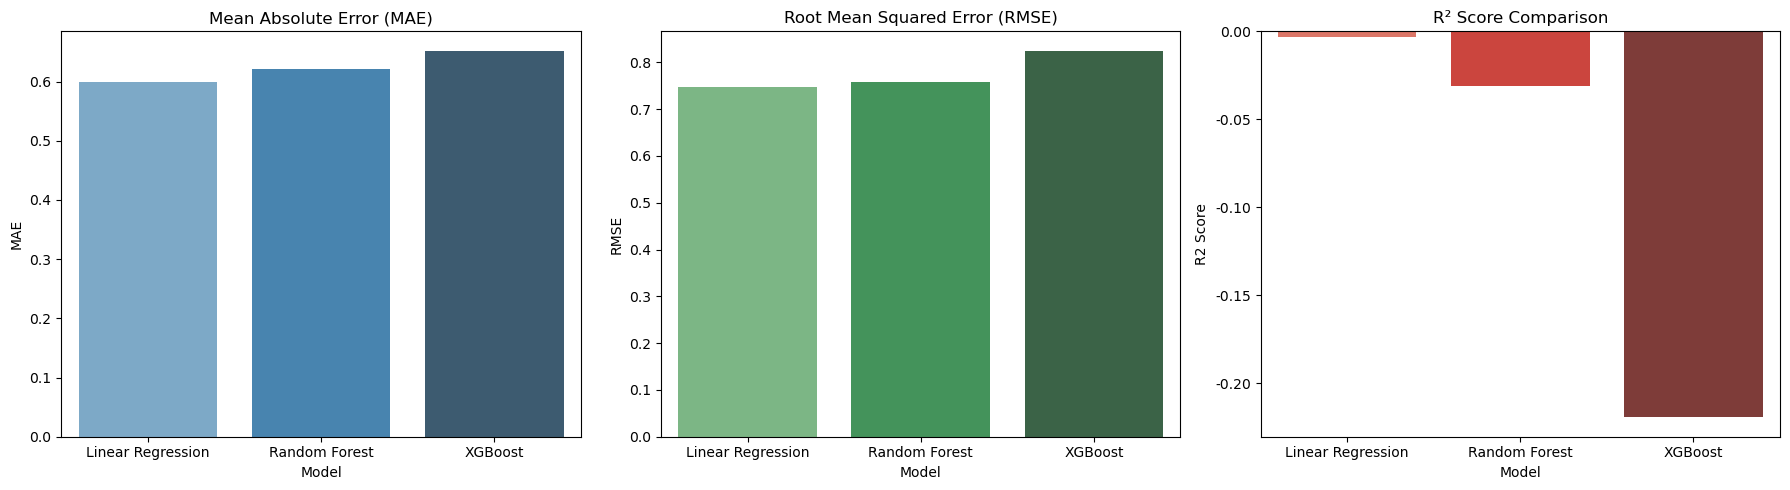


✅ Best Model: Linear Regression (R² Score = -0.0031)


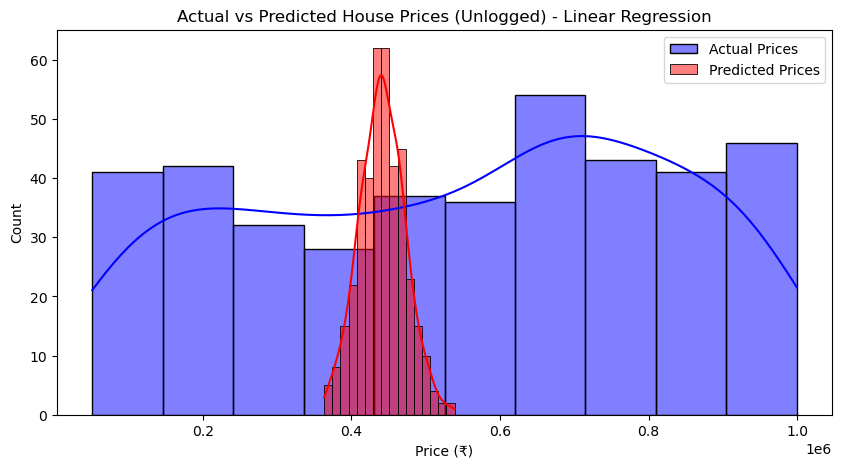


💰 Predicted House Price (Unlogged): ₹213338.49


In [4]:
# Step 1: Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Step 2: Load dataset
df = pd.read_csv("House.csv")

# Step 3: Drop irrelevant columns and handle missing values
df = df.drop(columns=["Address"], errors="ignore")
df = df.dropna()

# Step 4: Log-transform skewed columns
df["Price"] = np.log1p(df["Price"])
if "Area" in df.columns:
    df["Area"] = np.log1p(df["Area"])

# Step 5: One-hot encode categorical features
categorical_cols = df.select_dtypes(include=["object"]).columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Step 6: Prepare features and target
X = df.drop("Price", axis=1)
y = df["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Define models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42)
}

# Step 8: Train and evaluate models
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results.append({
        "Model": name,
        "MAE": mean_absolute_error(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
        "R2 Score": r2_score(y_test, y_pred)
    })

results_df = pd.DataFrame(results)
print("\n📊 Model Performance Summary (Log Price):\n", results_df)

# Step 9: Accuracy metric comparisons with improved Seaborn usage
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# MAE
sns.barplot(data=results_df, x="Model", y="MAE", hue="Model", legend=False, ax=axes[0], palette="Blues_d")
axes[0].set_title("Mean Absolute Error (MAE)")

# RMSE
sns.barplot(data=results_df, x="Model", y="RMSE", hue="Model", legend=False, ax=axes[1], palette="Greens_d")
axes[1].set_title("Root Mean Squared Error (RMSE)")

# R² Score
sns.barplot(data=results_df, x="Model", y="R2 Score", hue="Model", legend=False, ax=axes[2], palette="Reds_d")
axes[2].set_title("R² Score Comparison")
axes[2].yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))

plt.tight_layout()
plt.show()

# Step 10: Identify best model
best_model_name = results_df.loc[results_df["R2 Score"].idxmax(), "Model"]
best_model = models[best_model_name]
print(f"\n✅ Best Model: {best_model_name} (R² Score = {results_df.loc[results_df['R2 Score'].idxmax(), 'R2 Score']:.4f})")

# Step 11: Actual vs Predicted Prices (Unlogged)
y_pred_best = best_model.predict(X_test)

plt.figure(figsize=(10, 5))
sns.histplot(np.expm1(y_test), kde=True, color="blue", label="Actual Prices")
sns.histplot(np.expm1(y_pred_best), kde=True, color="red", label="Predicted Prices")
plt.title(f"Actual vs Predicted House Prices (Unlogged) - {best_model_name}")
plt.xlabel("Price (₹)")
plt.legend()
plt.show()

# Step 12: Predict on custom input
custom_input = {
    "Bedrooms": 3,
    "Bathrooms": 2,
    "Area": np.log1p(2000),
    "Stories": 2,
    "Mainroad": "yes",
    "Guestroom": "no",
    "Basement": "yes",
    "Hotwaterheating": "no",
    "Airconditioning": "yes",
    "Parking": 1,
    "Prefarea": "no",
    "Furnishingstatus": "furnished"
}

custom_df = pd.DataFrame([custom_input])
custom_df_encoded = pd.get_dummies(custom_df)
custom_df_encoded = custom_df_encoded.reindex(columns=X.columns, fill_value=0)

predicted_log_price = best_model.predict(custom_df_encoded)[0]
predicted_price = np.expm1(predicted_log_price)
print(f"\n💰 Predicted House Price (Unlogged): ₹{predicted_price:.2f}")
